In [1]:
import numpy as np
import cv2
import os
import random 
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from PIL import Image
from sklearn.preprocessing import OneHotEncoder 


DIRECTORY = r'datasets'
CATEGORIES = ['Cloudy', 'Rain', 'Shine', 'Sunrise']

IMG_SIZE = 256

data = []
label = []
result = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        img = Image.open(img_path)
        img = img.resize((IMG_SIZE,IMG_SIZE))
        img = np.array(img)
        if(img.shape == (IMG_SIZE,IMG_SIZE,3)):
            data.append([np.array(img), label])

In [2]:
random.shuffle(data)

In [3]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

X = np.array(X)
y = np.array(y)
X.shape

(1120, 256, 256, 3)

In [4]:
X.shape
# Converting to gray
X_gray = []
for i in range(1120):
    X_gray.append(0.299*X[i][:,:,0] + 0.587*X[i][:,:,1] + 0.114*X[i][:,:,2])

In [5]:
X_gray = np.array(X_gray)
X_gray.shape
X = np.array(X)

In [6]:
X_gray = X_gray.reshape(-1, 256, 256, 1)
X_gray.shape
X.shape

(1120, 256, 256, 3)

In [7]:
X_gray = X_gray/255
X = X/255

In [8]:
y[1]
y.shape
y[1]

2

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state=1)
X_train.shape

(1008, 256, 256, 3)

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import LeakyReLU

cnn = models.Sequential([
    layers.Conv2D(filters=64 , kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/3
29/29 [==============================] - 25s 835ms/step - loss: 1.2287 - accuracy: 0.5788 - val_loss: 1.6375 - val_accuracy: 0.5545
Epoch 2/3
29/29 [==============================] - 24s 814ms/step - loss: 0.7623 - accuracy: 0.7122 - val_loss: 0.4799 - val_accuracy: 0.8020
Epoch 3/3
29/29 [==============================] - 23s 809ms/step - loss: 0.5407 - accuracy: 0.8004 - val_loss: 0.4451 - val_accuracy: 0.8614


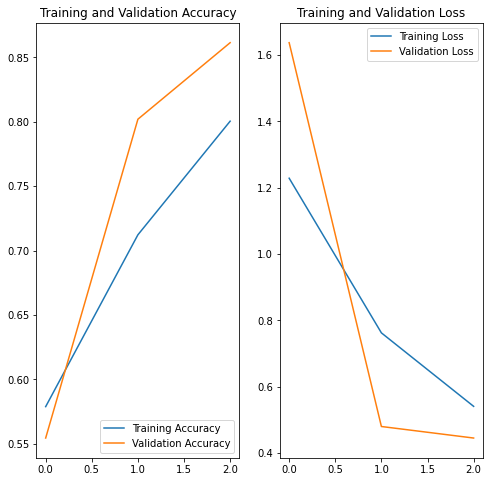

Epoch 1/3
29/29 [==============================] - 24s 818ms/step - loss: 0.4193 - accuracy: 0.8523 - val_loss: 0.3122 - val_accuracy: 0.9010
Epoch 2/3
29/29 [==============================] - 23s 780ms/step - loss: 0.3204 - accuracy: 0.8875 - val_loss: 0.3489 - val_accuracy: 0.8713
Epoch 3/3
29/29 [==============================] - 22s 763ms/step - loss: 0.2788 - accuracy: 0.8864 - val_loss: 0.2745 - val_accuracy: 0.8911


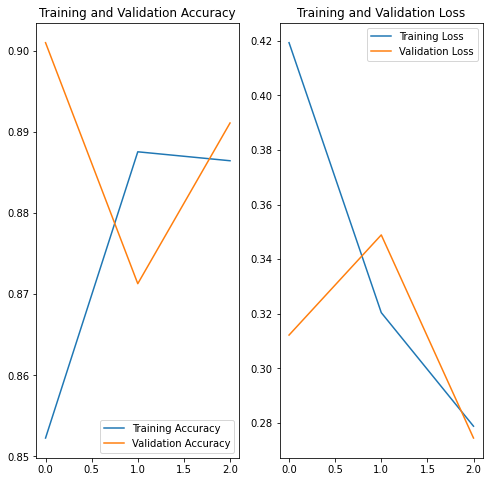

Epoch 1/3
29/29 [==============================] - 23s 771ms/step - loss: 0.2177 - accuracy: 0.9206 - val_loss: 0.4038 - val_accuracy: 0.8713
Epoch 2/3
29/29 [==============================] - 22s 745ms/step - loss: 0.2324 - accuracy: 0.8997 - val_loss: 0.4357 - val_accuracy: 0.8317
Epoch 3/3
29/29 [==============================] - 22s 740ms/step - loss: 0.1760 - accuracy: 0.9405 - val_loss: 0.3538 - val_accuracy: 0.8416


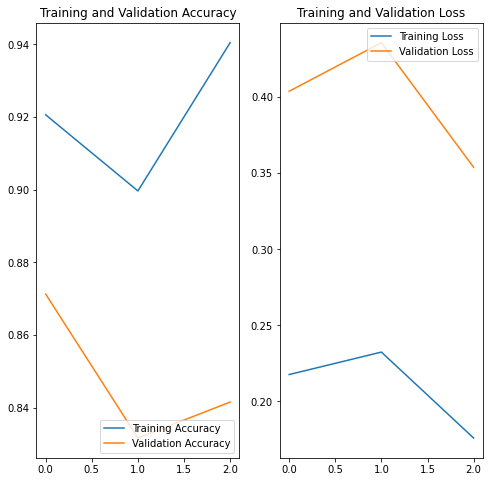

Epoch 1/3
29/29 [==============================] - 22s 755ms/step - loss: 0.1975 - accuracy: 0.9239 - val_loss: 0.1759 - val_accuracy: 0.9406
Epoch 2/3
29/29 [==============================] - 21s 742ms/step - loss: 0.1454 - accuracy: 0.9416 - val_loss: 0.1253 - val_accuracy: 0.9505
Epoch 3/3
29/29 [==============================] - 21s 738ms/step - loss: 0.1418 - accuracy: 0.9537 - val_loss: 0.1789 - val_accuracy: 0.9406


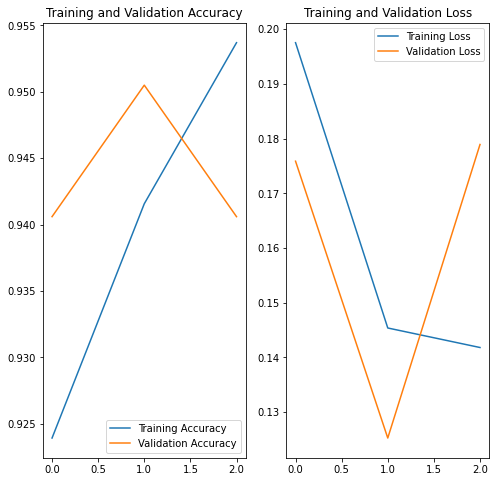

Epoch 1/3
29/29 [==============================] - 22s 757ms/step - loss: 0.1286 - accuracy: 0.9482 - val_loss: 0.0668 - val_accuracy: 0.9802
Epoch 2/3
29/29 [==============================] - 22s 757ms/step - loss: 0.0768 - accuracy: 0.9768 - val_loss: 0.0604 - val_accuracy: 0.9802
Epoch 3/3
29/29 [==============================] - 22s 755ms/step - loss: 0.1575 - accuracy: 0.9383 - val_loss: 0.0503 - val_accuracy: 0.9901


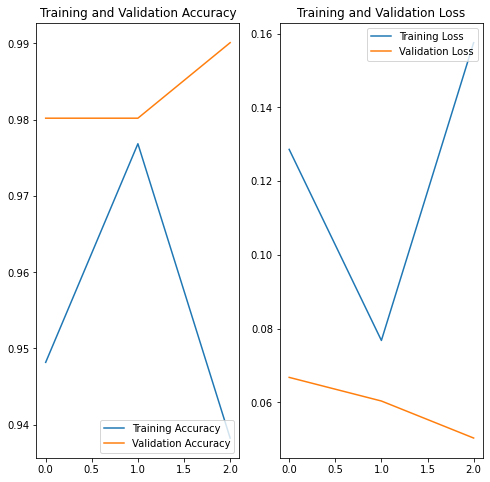

Epoch 1/3
29/29 [==============================] - 26s 837ms/step - loss: 0.0901 - accuracy: 0.9691 - val_loss: 0.0748 - val_accuracy: 0.9703
Epoch 2/3
29/29 [==============================] - 22s 773ms/step - loss: 0.0566 - accuracy: 0.9813 - val_loss: 0.0493 - val_accuracy: 0.9901
Epoch 3/3
29/29 [==============================] - 22s 745ms/step - loss: 0.0419 - accuracy: 0.9868 - val_loss: 0.0322 - val_accuracy: 0.9901


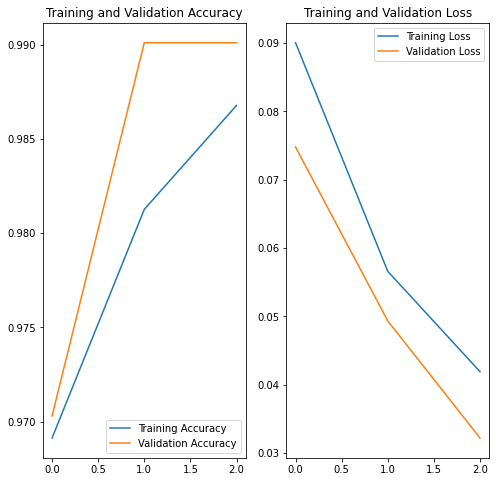

Epoch 1/3
29/29 [==============================] - 23s 759ms/step - loss: 0.0589 - accuracy: 0.9791 - val_loss: 0.1144 - val_accuracy: 0.9406
Epoch 2/3
29/29 [==============================] - 23s 799ms/step - loss: 0.0550 - accuracy: 0.9779 - val_loss: 0.0542 - val_accuracy: 0.9901
Epoch 3/3
29/29 [==============================] - 22s 752ms/step - loss: 0.0416 - accuracy: 0.9835 - val_loss: 0.0912 - val_accuracy: 0.9802


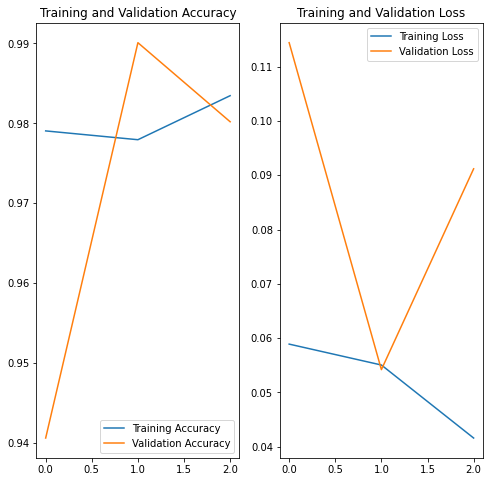

Epoch 1/3
29/29 [==============================] - 23s 739ms/step - loss: 0.0785 - accuracy: 0.9779 - val_loss: 0.1323 - val_accuracy: 0.9604
Epoch 2/3
29/29 [==============================] - 22s 745ms/step - loss: 0.1724 - accuracy: 0.9614 - val_loss: 0.0667 - val_accuracy: 0.9703
Epoch 3/3
29/29 [==============================] - 21s 730ms/step - loss: 0.0667 - accuracy: 0.9824 - val_loss: 0.0535 - val_accuracy: 0.9802


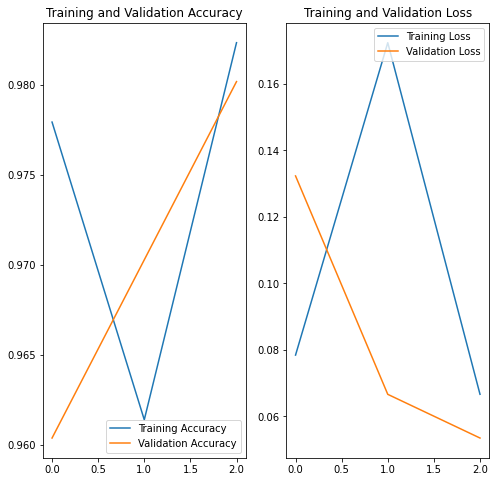

Epoch 1/3
29/29 [==============================] - 22s 730ms/step - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 2/3
29/29 [==============================] - 21s 735ms/step - loss: 0.0162 - accuracy: 0.9956 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 3/3
29/29 [==============================] - 21s 723ms/step - loss: 0.0371 - accuracy: 0.9857 - val_loss: 0.0152 - val_accuracy: 1.0000


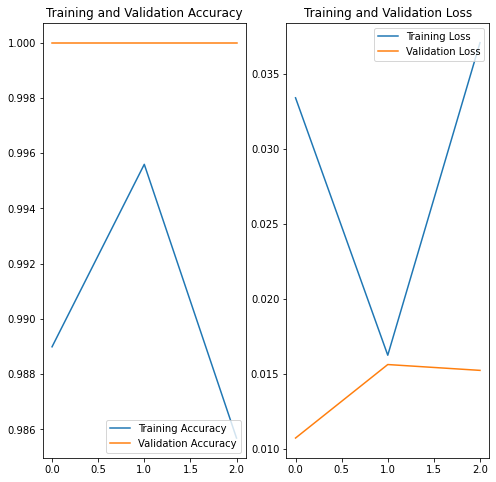

Epoch 1/3
29/29 [==============================] - 24s 793ms/step - loss: 0.0180 - accuracy: 0.9956 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 2/3
29/29 [==============================] - 22s 744ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 3/3
29/29 [==============================] - 21s 740ms/step - loss: 0.0237 - accuracy: 0.9879 - val_loss: 0.0410 - val_accuracy: 0.9900


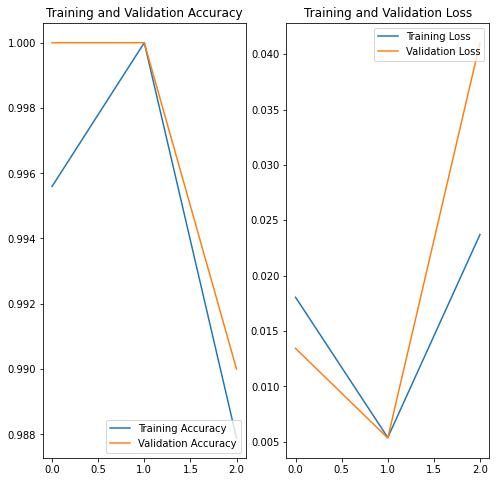

In [11]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
import matplotlib.pyplot as plt

for train_idx, test_idx in folds.split(X_train,y_train):
    X_tr, X_te, y_tr, y_te = X_train[train_idx], X_train[test_idx], \
                                       y_train[train_idx], y_train[test_idx]
    history = cnn.fit(X_tr,y_tr,epochs=3,validation_data=(X_te,y_te),batch_size=32,verbose=1)

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(3)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [12]:
cnn.evaluate(X_test,y_test)

4/4 [==============================] - 1s 226ms/step - loss: 0.5214 - accuracy: 0.9107


[0.5213879942893982, 0.910714328289032]

In [13]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.04629100e-06, 8.76558417e-08, 9.99997735e-01, 1.60697127e-07,
        1.44372667e-10, 2.13739250e-21, 3.10245246e-16, 5.49806222e-19,
        2.22434833e-14, 2.22189739e-16],
       [6.09884526e-33, 4.43079593e-30, 1.32801434e-21, 1.00000000e+00,
        1.45756120e-33, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.09098695e-01, 4.48899198e-04, 8.90407503e-01, 1.85084227e-05,
        5.20382812e-08, 1.87517326e-08, 1.02325949e-07, 3.24618519e-08,
        2.61796558e-05, 2.92418045e-09],
       [6.27078116e-03, 8.54268706e-07, 9.92456555e-01, 1.27176289e-03,
        2.29683250e-09, 1.61391969e-10, 3.09778453e-10, 7.83985550e-12,
        1.32286282e-09, 1.47963822e-10],
       [2.09373236e-13, 1.78368494e-15, 7.71554376e-10, 1.00000000e+00,
        1.56449971e-15, 6.14374764e-20, 2.20644390e-21, 1.64489550e-20,
        1.82449077e-18, 1.88436319e-19]], dtype=float32)

In [14]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[2, 3, 2, 2, 3]

In [15]:
y_test[:5]

array([2, 3, 2, 0, 3])

In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report(K-fold): \n", classification_report(y_test, y_pred_classes))

Classification Report(K-fold): 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.95      0.86      0.90        21
           2       0.85      0.92      0.88        25
           3       1.00      0.97      0.99        36

    accuracy                           0.91       112
   macro avg       0.91      0.90      0.91       112
weighted avg       0.91      0.91      0.91       112



Text(69.0, 0.5, 'Truth')

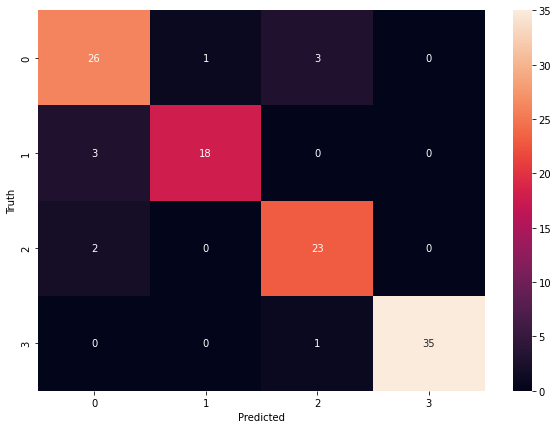

In [17]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_classes)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, _ = roc_curve(y_test, y_classes)
pyplot.plot(fpr, tpr)
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

ValueError: multiclass format is not supported